In [2]:
# load the data
import os

import pandas as pd

from analysis import load_data
from config import STATS_DIR

stats = []
for f in os.listdir(STATS_DIR):
    if not f.endswith(".json"):
        continue
    basename = os.path.basename(f)
    json_data = load_data(f"{STATS_DIR}{f}")
    if "compile_time" not in json_data:
        json_data["compile_time"] = json_data["total_time"]

    json_data["cnf"] = basename
    stats.append(json_data)

df = pd.DataFrame(stats)

# remove 0 columns
df = df.loc[:, (df != 0).any(axis=0)]

df = df.sort_values("compile_time", ascending=False).reset_index(drop=True)

df

,total_time,sat_is_instantiated_var,sat_is_irrelevant_var,sat_var2pliteral,sat_var2nliteral,sat_is_implied_literal,sat_decide_literal,sat_undo_decide_literal,sat_is_subsumed_clause,sat_assert_clause,...,nnf_manager_set_root,nnf_manager_save_to_file,vtree_manager_new,vtree_manager_free,vtree_print_widths,vtree_is_leaf,vtree_is_shannon_node,vtree_shannon_var,compile_time,cnf
0,1380.919,34.153596,0.074540,41.535466,36.831127,87.008131,15.888742,4.390211,231.464264,0.028883,...,0.000000,20.671369,40.031338,0.365593,0.000149,13.301496,46.281299,33.765887,1380.919,prob004-log-a.cnf.json
1,1245.095,0.169409,0.119198,5.815145,5.368770,11.483351,616.680790,7.814888,10.536172,540.061874,...,0.000000,0.044489,0.711005,0.013019,0.000014,0.092931,0.168255,0.265144,1245.095,uf250-026.cnf.json
2,727.703,20.560665,0.296785,29.230303,28.546969,52.705531,67.691150,4.621881,37.909859,1.125925,...,0.000008,11.481060,0.060109,0.659810,0.000019,11.194972,25.799262,23.799013,727.703,c1355.isc.cnf.json
3,453.189,2.641139,0.117767,21.046489,19.841456,43.027598,1.207999,0.482178,90.554856,0.000002,...,0.000000,5.309292,1.276371,0.568505,0.000058,1.596487,5.116821,2.855053,453.189,C230_FR.cnf.json
4,374.828,9.256477,0.170710,13.757459,13.624799,27.846372,3.386126,0.567401,40.222180,0.141159,...,0.000008,18.360239,0.115987,0.659072,0.000018,4.498466,10.752494,9.295331,374.828,2bitmax_6.cnf.json
5,171.751,2.635861,0.102701,7.656701,7.534386,14.642668,14.160408,0.529546,16.070542,0.180637,...,0.000000,5.697751,0.036016,0.353301,0.000013,1.772978,3.698473,3.068118,171.751,c499.isc.cnf.json
6,159.200,0.966498,0.116048,9.919313,9.756868,19.603339,3.154480,0.905311,17.301501,0.000028,...,0.000008,5.896200,0.132940,0.081433,0.000028,0.535272,1.181925,1.099768,159.200,s1423.bench.cnf.json
7,152.140,0.209100,0.024405,0.363784,0.345356,0.742450,62.951332,12.694325,16.129981,29.117440,...,0.000000,0.036316,2.755990,0.016854,0.000029,0.097359,0.306414,0.235973,152.140,4blocksb.cnf.json
8,143.747,0.471292,0.042859,8.886127,8.525150,17.771162,0.487390,0.205529,21.485305,0.000009,...,0.000000,1.161588,1.016464,0.318840,0.000064,0.267264,0.940546,0.503723,143.747,C210_FVF.cnf.json
9,142.537,0.889606,0.044765,7.535453,7.240540,15.423972,0.645149,0.248053,23.023423,0.000042,...,0.000000,0.418428,2.725807,0.081551,0.000059,0.527101,1.669492,0.952061,142.537,C163_FW.cnf.json


In [3]:
total_df = pd.DataFrame()
total_df["cnf"] = df["cnf"]
total_df["total_time"] = df["total_time"]
total_df["compile_time"] = df["compile_time"]
total_df["sat_total"] = df.filter(like="sat_").sum(axis=1)
total_df["vtree_total"] = df.filter(like="vtree_").sum(axis=1)
total_df["nnf_total"] = df.filter(like="nnf_").sum(axis=1)

total_df["vtree_manager_new"] = df["vtree_manager_new"]
total_df["sat_state_new"] = df["sat_state_new"]

total_df["diff_time"] = total_df["total_time"] - total_df["compile_time"]

total_df

,cnf,total_time,compile_time,sat_total,vtree_total,nnf_total,vtree_manager_new,sat_state_new,diff_time
0,prob004-log-a.cnf.json,1380.919,1380.919,451.408850,133.745762,113.527230,40.031338,0.015589,0.0
1,uf250-026.cnf.json,1245.095,1245.095,1198.543917,1.250368,0.046374,0.711005,0.002381,0.0
2,c1355.isc.cnf.json,727.703,727.703,242.703532,61.513185,73.002821,0.060109,0.002896,0.0
3,C230_FR.cnf.json,453.189,453.189,179.326186,11.413295,13.663433,1.276371,0.006882,0.0
4,2bitmax_6.cnf.json,374.828,374.828,109.932934,25.321368,48.390074,0.115987,0.002124,0.0
5,c499.isc.cnf.json,171.751,171.751,63.912341,8.928899,15.103400,0.036016,0.002120,0.0
6,s1423.bench.cnf.json,159.200,159.200,61.726836,3.031366,9.953420,0.132940,0.003215,0.0
7,4blocksb.cnf.json,152.140,152.140,122.662508,3.412619,0.208144,2.755990,0.023790,0.0
8,C210_FVF.cnf.json,143.747,143.747,57.883810,3.046901,2.747079,1.016464,0.005853,0.0
9,C163_FW.cnf.json,142.537,142.537,55.059546,5.956071,3.238014,2.725807,0.007640,0.0


In [4]:
# sat as a percent of compile time
total_df["sat_percent"] = total_df["sat_total"] / total_df["compile_time"]

total_df

,cnf,total_time,compile_time,sat_total,vtree_total,nnf_total,vtree_manager_new,sat_state_new,diff_time,sat_percent
0,prob004-log-a.cnf.json,1380.919,1380.919,451.408850,133.745762,113.527230,40.031338,0.015589,0.0,0.326890
1,uf250-026.cnf.json,1245.095,1245.095,1198.543917,1.250368,0.046374,0.711005,0.002381,0.0,0.962612
2,c1355.isc.cnf.json,727.703,727.703,242.703532,61.513185,73.002821,0.060109,0.002896,0.0,0.333520
3,C230_FR.cnf.json,453.189,453.189,179.326186,11.413295,13.663433,1.276371,0.006882,0.0,0.395698
4,2bitmax_6.cnf.json,374.828,374.828,109.932934,25.321368,48.390074,0.115987,0.002124,0.0,0.293289
5,c499.isc.cnf.json,171.751,171.751,63.912341,8.928899,15.103400,0.036016,0.002120,0.0,0.372122
6,s1423.bench.cnf.json,159.200,159.200,61.726836,3.031366,9.953420,0.132940,0.003215,0.0,0.387731
7,4blocksb.cnf.json,152.140,152.140,122.662508,3.412619,0.208144,2.755990,0.023790,0.0,0.806248
8,C210_FVF.cnf.json,143.747,143.747,57.883810,3.046901,2.747079,1.016464,0.005853,0.0,0.402678
9,C163_FW.cnf.json,142.537,142.537,55.059546,5.956071,3.238014,2.725807,0.007640,0.0,0.386282


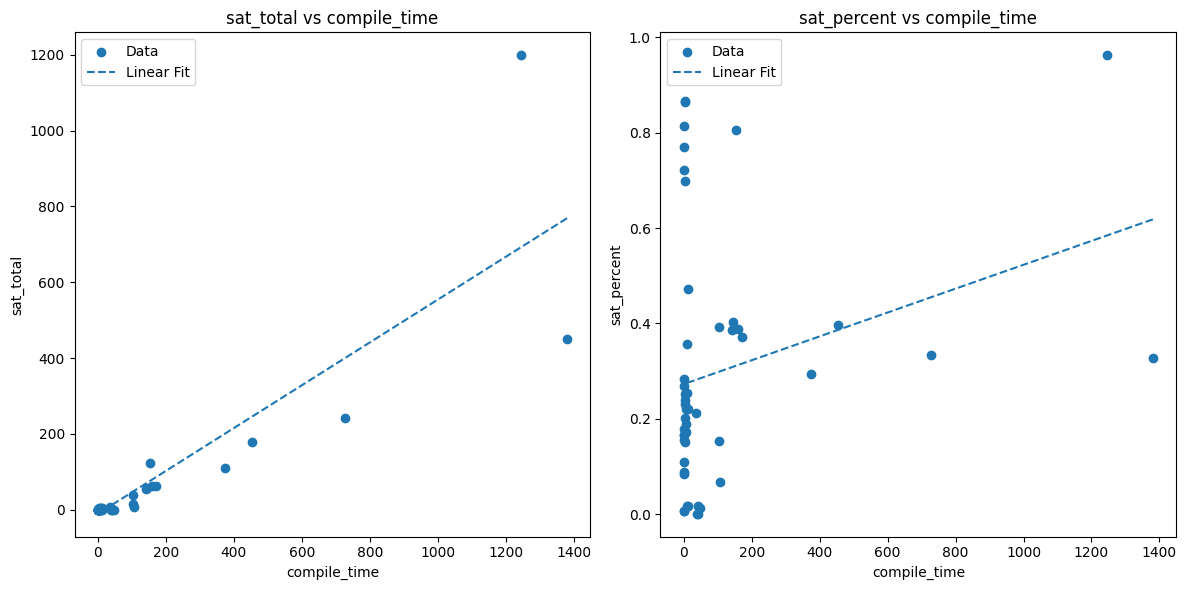

In [5]:
# plot compile time vs sat time

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

degree = 1
coefficients_total = np.polyfit(total_df['compile_time'], total_df['sat_total'], degree)
poly_total = np.poly1d(coefficients_total)

axes[0].scatter(total_df['compile_time'], total_df['sat_total'], marker='o', linestyle='-', label='Data')
axes[0].plot(total_df['compile_time'], poly_total(total_df['compile_time']), linestyle='--', label='Linear Fit')
axes[0].set_title('sat_total vs compile_time')
axes[0].set_xlabel('compile_time')
axes[0].set_ylabel('sat_total')
axes[0].legend()

coefficients_percent = np.polyfit(total_df['compile_time'], total_df['sat_percent'], degree)
poly_percent = np.poly1d(coefficients_percent)

axes[1].scatter(total_df['compile_time'], total_df['sat_percent'], marker='o', linestyle='-', label='Data')
axes[1].plot(total_df['compile_time'], poly_percent(total_df['compile_time']), linestyle='--', label='Linear Fit')
axes[1].set_title('sat_percent vs compile_time')
axes[1].set_xlabel('compile_time')
axes[1].set_ylabel('sat_percent')
axes[1].legend()

plt.tight_layout()

plt.show()

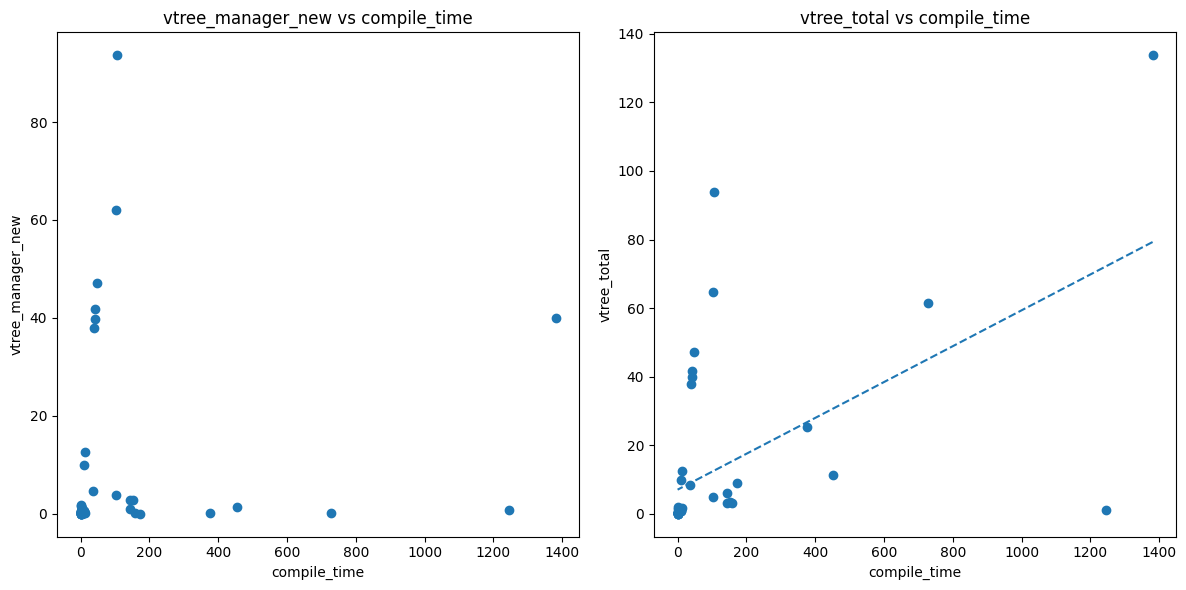

In [6]:
# plot vtree manager new vs compile time

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].scatter(total_df['compile_time'], total_df['vtree_manager_new'], marker='o', linestyle='-')
axes[0].set_title('vtree_manager_new vs compile_time')
axes[0].set_xlabel('compile_time')
axes[0].set_ylabel('vtree_manager_new')

degree = 1
coefficients_total = np.polyfit(total_df['compile_time'], total_df['vtree_total'], degree)
poly_total = np.poly1d(coefficients_total)

axes[1].scatter(total_df['compile_time'], total_df['vtree_total'], marker='o', linestyle='-')
axes[1].plot(total_df['compile_time'], poly_total(total_df['compile_time']), linestyle='--', label='Linear Fit')
axes[1].set_title('vtree_total vs compile_time')
axes[1].set_xlabel('compile_time')
axes[1].set_ylabel('vtree_total')

plt.tight_layout()

plt.show()